# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Feivel Jethro Ezhekiel
- **Email:** feiveljethroezhekiel@gmail.com
- **ID Dicoding:** MC008D5Y0587

## Menentukan Pertanyaan Bisnis

- *Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?*<br>
**S**: Menganalisis dampak faktor cuaca (hujan, suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda.<br>
**M**: Mengukur korelasi dan pola tren dari variabel cuaca terhadap jumlah transaksi penyewaan.<br>
**A**: Dapat dijawab dengan analisis regresi dan visualisasi data.<br>
**R**: Membantu operator dalam perencanaan kapasitas sepeda sesuai dengan kondisi cuaca.<br>
**T**: Dapat dianalisis berdasarkan data harian atau bulanan dalam satu tahun terakhir.<br>
- *Apakah terdapat perbedaan perilaku penyewaan antara pengguna terdaftar dan pengguna kasual?*<br>
**S**: Membandingkan pola peminjaman antara pelanggan terdaftar dan kasual.<br>
**M**: Menganalisis jumlah penyewaan berdasarkan kategori pengguna.<br>
**A**: Bisa dilakukan dengan eksplorasi variabel pengguna terdaftar dan tidak.<br>
**R**: Berguna untuk strategi pemasaran dan retensi pelanggan.<br>
**T**: Dapat ditinjau dalam periode mingguan atau bulanan.<br>

## Import Semua Packages/Library yang Digunakan

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Data Wrangling

### Gathering Data

In [253]:
bike_aggHours_df = pd.read_csv("bike_sharing_dataset/hour.csv")
bike_aggHours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [254]:
bike_aggDay_df = pd.read_csv("bike_sharing_dataset/day.csv")
bike_aggDay_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada data pertama yang bernama "bike_aggHours_df" merupakan data yang memiliki 17 features yang merupakan jumlah sharing-bikes dikumpulkan berdasarkan per jam. Catatan: 17379 jam
- Data kedua yang bernama "bike_aggDay_df" adalah jumlah data sharing-bikes dikumpulkan berdasarkan hari tapi tidak ada keterangan jam jadi hanya terdapat 16 features

### Assessing Data

#### Menilai tabel `bike_aggHours_df`

In [255]:
# Melihat detail tipe data dan jumlah data pada setiap features
bike_aggHours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [256]:
# Mencari apakah terdapat nilai yang kosong pada masing-masing features
bike_aggHours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [257]:
# Melihat duplikasi data
print("Jumlah duplikasi: ", bike_aggHours_df.duplicated().sum())

Jumlah duplikasi:  0


In [258]:
bike_aggHours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Menilai tabel `bike_aggDay_df`

In [259]:
bike_aggDay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [260]:
print("Jumlah Duplikasi: ", bike_aggDay_df.duplicated().sum())
bike_aggDay_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Data pada penggunaan bike-sharing berdasarkan jam dan hari tidak memiliki nilai yang kosong(Nan) Values
- tidak juga memiliki duplikasi data
- format data juga sesuai dengan yang seharusnya, sehingga bisa dikatakan pada dataset bike-sharing hour dan day cukup bersih, tetapi perlu dikasi lebih dalam terutama pada proses EDA
- Tetapi pada bagian dteday pada kedua data memilki format data `object` yang seharusnya `string`

### Cleaning Data

In [261]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    bike_aggHours_df[column] = pd.to_datetime(bike_aggHours_df[column])
    bike_aggDay_df[column] = pd.to_datetime(bike_aggDay_df[column])

In [262]:
bike_aggHours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [263]:
bike_aggDay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Bentuk data pada date di kedua dataframe sudah diubah menjadi string data.

## Exploratory Data Analysis (EDA)

### Explore
karena kita memiliki 2 pertanyaan bisnis dengan pertanyaan pertama berkaitan dengan cuaca dan pertanyaan kedua terkait keterdaftaran pengguna dengan sistem bike-sharing ini, maka kita perlu mengetahui perbandingan cuaca dan juga pendaftar akun.
1. Mencoba menggabungkan berdasarkan season, mnth, hr, holiday, weekday, workday, weather, temp, dan atemp terjadap jumlah peminjaman
2. Mencoba menggabungkan berdasarkan casual dan registered terhadap jumlah peminjaman

#### Pemakaian Sepeda berdasarkan jumlah jam

In [264]:
bike_aggHours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [265]:
bike_aggHours_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    4496
2    4409
1    4242
4    4232
Name: instant, dtype: int64

In [266]:
bike_aggDay_df.groupby(by="season")["cnt"].sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

In [267]:
bike_aggHours_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: instant, dtype: int64

In [268]:
bike_aggDay_df.groupby(by="mnth")["cnt"].sum().sort_values(ascending=False)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

In [269]:
bike_aggHours_df.groupby(by="hr")["cnt"].sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

In [270]:
bike_aggHours_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    16879
1      500
Name: instant, dtype: int64

In [271]:
bike_aggHours_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: instant, dtype: int64

In [272]:
bike_aggDay_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    710
1     21
Name: instant, dtype: int64

In [273]:
bike_aggDay_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [274]:
bike_aggHours_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

In [275]:
# Mapping kategori cuaca
season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
# Mengubah nilai pada kolom 'weathersit'
bike_aggDay_df['season'] = bike_aggDay_df['season'].map(season_mapping)
bike_aggHours_df['season'] = bike_aggHours_df['season'].map(season_mapping)

# Cek hasil perubahan
bike_aggDay_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
Fall      188
Summer    184
Spring    181
Winter    178
Name: instant, dtype: int64

In [276]:
bike_aggDay_df.groupby(by="season")["cnt"].sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

In [277]:
bike_aggHours_df.groupby(by="season")["cnt"].sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

## Mengubah data numeric menjadi kategorikal

In [278]:
# Mapping kategori cuaca
weather_mapping = {
    1: "Clear/Few clouds",
    2: "Mist + Cloudy",
    3: "Light Snow",
    4: "Very bad Weather" #Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
}

# Mengubah nilai pada kolom 'weathersit'
bike_aggDay_df['weathersit'] = bike_aggDay_df['weathersit'].map(weather_mapping)
bike_aggHours_df['weathersit'] = bike_aggHours_df['weathersit'].map(weather_mapping)

# Cek hasil perubahan

bike_aggDay_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
Clear/Few clouds    463
Mist + Cloudy       247
Light Snow           21
Name: instant, dtype: int64

In [281]:
bike_aggHours_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    11865
0     5514
Name: instant, dtype: int64

In [282]:
bike_aggDay_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    500
0    231
Name: instant, dtype: int64

In [283]:
bike_aggHours_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.84    138
0.14    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.02     17
0.08     17
0.04     16
0.06     16
0.96     16
0.98      1
1.00      1
Name: instant, dtype: int64

In [284]:
bike_aggDay_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.265833    5
0.635000    5
0.680000    4
0.710833    4
0.649167    4
           ..
0.390000    1
0.389167    1
0.389091    1
0.384348    1
0.861667    1
Name: instant, Length: 499, dtype: int64

In [285]:
bike_aggHours_df.groupby(by="atemp").instant.nunique().sort_values(ascending=False)

atemp
0.6212    988
0.5152    618
0.4091    614
0.3333    600
0.6667    593
         ... 
0.0152      4
0.9848      2
0.0000      2
0.9545      1
1.0000      1
Name: instant, Length: 65, dtype: int64

In [286]:
bike_aggDay_df.groupby(by="atemp").instant.nunique().sort_values(ascending=False)

atemp
0.654688    4
0.375621    3
0.637008    3
0.450121    2
0.724121    2
           ..
0.390133    1
0.390146    1
0.390767    1
0.390779    1
0.840896    1
Name: instant, Length: 690, dtype: int64

**Insight:**
- Sepeda banyak dipinjam ketika season fall paling banyak, kedua itu summer, ketiga itu springer, dan terakhir winter
- bulan paling banyak ada di bulan 8, 6, dan 9
- Jumlah pemakaian jam yang paling sering dipinjam ada di jam 17, 18, dan 8. Artinya pengguna banyak menggunakan ketika pulang kerja dan ketika berangkat kerja
- Jumlah sepeda paling banyak dipinjam ada pada hari kerja, berbading terbalik dengan hari libur, sehingga jumlah peminjam dihari libur jauh lebih sedikit dibanding hari kerja.
- Hari paling banyak dipinjam adalah minggu dan senin diikuti hari jumat
- Sepeda paling banyak digunakan ketika Working day
- Sepeda paling banyak dipinjam ketika situasi cuacanya sedang jelas, sedikit berawan, diikuti ketika berkabut, sedikit bersalju, dan ketika cuaca ekstrim hanya 3 orang yang pakai
- Sepeda banyak dipinjam ketika suhu relatif dan absolut ketika 25 derajat celcius

**Conclusion:**
Ternyata musim, cuaca, kondisi cuaca, bulan, dan jam mempengaruhi jumlah peminjaman bike-sharing, seperti musim paling banyak adalah musim fall pada musim gugur dan panas dan banyak liburan serta event di bulan Mei seperti Memorial Day, Independence Day, serta Christmas dan New Year dibulan ke 12.

#### Perilaku pengguna terdaftar dan kasual

**Notes**
pengguna terdaftar adalah pengguna yang berlangganan menggunakan aplikasi, sedangkan kasual adalah pengguna yang hanya menggunakan sekali-kali ketika ada event tertentu, biasanya turis. 

In [287]:
bike_aggDay_df[['casual', 'registered']].head()

,casual,registered
0,331,654
1,131,670
2,120,1229
3,108,1454
4,82,1518


In [288]:
bike_aggHours_df.groupby('hr')[['casual', 'registered']].sum()

,casual,registered
hr,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


In [289]:
# Kelompokkan data berdasarkan jam dan jumlahkan pengguna casual & registered
hourly_summary = bike_aggHours_df.groupby('hr')[['casual', 'registered']].sum()

# Mencari jam dengan jumlah penyewaan tertinggi dan terendah
casual_max_hour = hourly_summary['casual'].idxmax()
casual_min_hour = hourly_summary['casual'].idxmin()

registered_max_hour = hourly_summary['registered'].idxmax()
registered_min_hour = hourly_summary['registered'].idxmin()

# Menampilkan hasil
print(f"Casual -> Tertinggi: Jam {casual_max_hour}, Terendah: Jam {casual_min_hour}")
print(f"Registered -> Tertinggi: Jam {registered_max_hour}, Terendah: Jam {registered_min_hour}")

Casual -> Tertinggi: Jam 14, Terendah: Jam 4
Registered -> Tertinggi: Jam 17, Terendah: Jam 4


In [290]:
def max_min(x_df, fts1):
    summary = x_df.groupby(fts1)[['casual', 'registered']].sum()

    casual_max_value = summary['casual'].idxmax()
    casual_min_value = summary['casual'].idxmin()

    registered_max_value = summary['registered'].idxmax()
    registered_min_value = summary['registered'].idxmin()

    print(f"casual -> Tertinggi: Index ke-{casual_max_value}, Terendah: Index ke-{casual_min_value}")
    print(f"Registered -> Tertinggi: Index ke-{registered_max_value}, Terendah: Index ke-{registered_min_value}")

In [291]:
max_min(bike_aggHours_df, 'hr')

casual -> Tertinggi: Index ke-14, Terendah: Index ke-4
Registered -> Tertinggi: Index ke-17, Terendah: Index ke-4


In [292]:
bike_aggDay_df.groupby('weekday')[['casual', 'registered']].sum()

,casual,registered
weekday,,
0,140521,303506
1,70784,384719
2,57843,411266
3,57319,415729
4,61460,423935
5,78238,409552
6,153852,323955


In [293]:
max_min(bike_aggDay_df, 'weekday')

casual -> Tertinggi: Index ke-6, Terendah: Index ke-3
Registered -> Tertinggi: Index ke-4, Terendah: Index ke-0


In [294]:
bike_aggDay_df.groupby('season')[['casual', 'registered']].sum()

,casual,registered
season,,
Fall,226091,835038
Spring,60622,410726
Summer,203522,715067
Winter,129782,711831


In [295]:
max_min(bike_aggDay_df, 'season')

casual -> Tertinggi: Index ke-Fall, Terendah: Index ke-Spring
Registered -> Tertinggi: Index ke-Fall, Terendah: Index ke-Spring


In [296]:
bike_aggDay_df.groupby('workingday')[['casual', 'registered']].sum()

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


In [297]:
max_min(bike_aggDay_df, 'workingday')

casual -> Tertinggi: Index ke-0, Terendah: Index ke-1
Registered -> Tertinggi: Index ke-1, Terendah: Index ke-0


In [298]:
bike_aggDay_df[['casual', 'registered']].describe()

,casual,registered
count,731.000000,731.000000
mean,848.176471,3656.172367
std,686.622488,1560.256377
min,2.000000,20.000000
25%,315.500000,2497.000000
50%,713.000000,3662.000000
75%,1096.000000,4776.500000
max,3410.000000,6946.000000


In [299]:
bike_aggHours_df[['casual', 'registered']].describe()

,casual,registered
count,17379.000000,17379.000000
mean,35.676218,153.786869
std,49.305030,151.357286
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


#### Insights

1. Pengguna casual **paling banyak meminjam di jam 14** dan paling rendah di jam 4 pagi, sedangkan pengguna **terdaftar lebih banyak meminjam di pukul 17** dan paling rendah di pukul 4
2. Pengguna **casual** paling banyak meminjam sepeda di hari **minggu** dan paling rendah pada hari kamis, sedangkan pengguna **registered** paling banyak di hari jumat dan paling sedikit pada hari senin.
3. Kedua pengguna sama sama lebih banyak meminjam sepeda di musim gugur dan paling rendah di musim semi.
4. Setiap hari selama 2 tahun, pengguna paling rendah ada 2 orang yang meminjam dalam satu hari pada pengguna casual, sedangkan pengguna terdaftar minimum 20 orang.

## Visualization & Explanatory Analysis

### Pertanyaan 1: *Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?*

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_21711/3100367595.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=weather_summary, y='weathersit', x='cnt', palette='viridis')


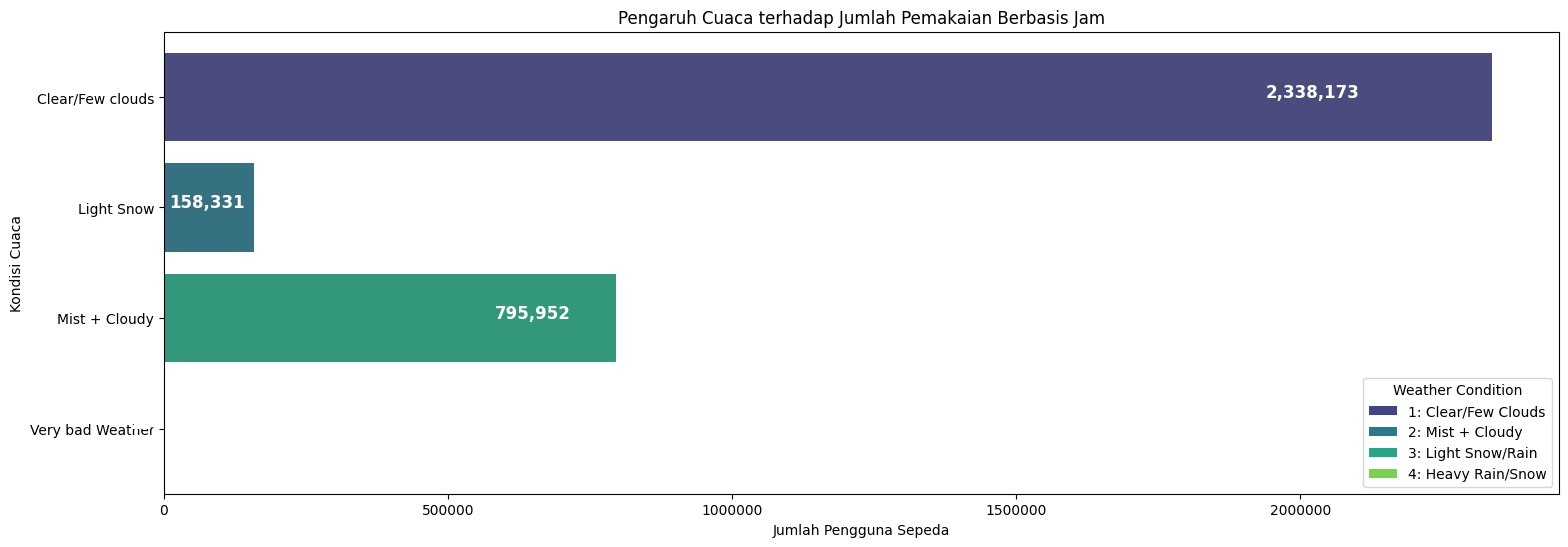

In [300]:
# Kelompokkan data berdasarkan kondisi cuaca (weathersit) dan hitung total jumlah pengguna
weather_summary = bike_aggHours_df.groupby('weathersit')['cnt'].sum().reset_index()

# Ubah 'weathersit' menjadi kategori
weather_summary['weathersit'] = weather_summary['weathersit'].astype(str)

# Buat bar plot vertikal
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=weather_summary, y='weathersit', x='cnt', palette='viridis')

# Tambahkan label di dalam batang bar
for index, value in enumerate(weather_summary['cnt']):
    plt.text(value - (value * 0.1), index, f"{int(value):,}", color='white', ha='right', fontsize=12, fontweight='bold')

# Format label sumbu X agar menjadi angka bulat
plt.xticks(ticks=plt.xticks()[0], labels=[int(x) for x in plt.xticks()[0]])

# Tambahkan label dan judul
plt.ylabel('Kondisi Cuaca')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.title('Pengaruh Cuaca terhadap Jumlah Pemakaian Berbasis Jam')

# Tambahkan legend secara manual
legend_labels = ['1: Clear/Few Clouds', '2: Mist + Cloudy', '3: Light Snow/Rain', '4: Heavy Rain/Snow']
for i, label in enumerate(legend_labels):
    plt.bar(0, 0, color=sns.color_palette('viridis', 4)[i], label=label)  # Dummy bars

plt.legend(title="Weather Condition", loc="lower right")

# Tampilkan plot
plt.show()

In [301]:
bike_aggHours_df['weathersit'].isnull().sum()

np.int64(0)

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_21711/2212277863.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=weather_summary, y='weathersit', x='cnt', palette='viridis')


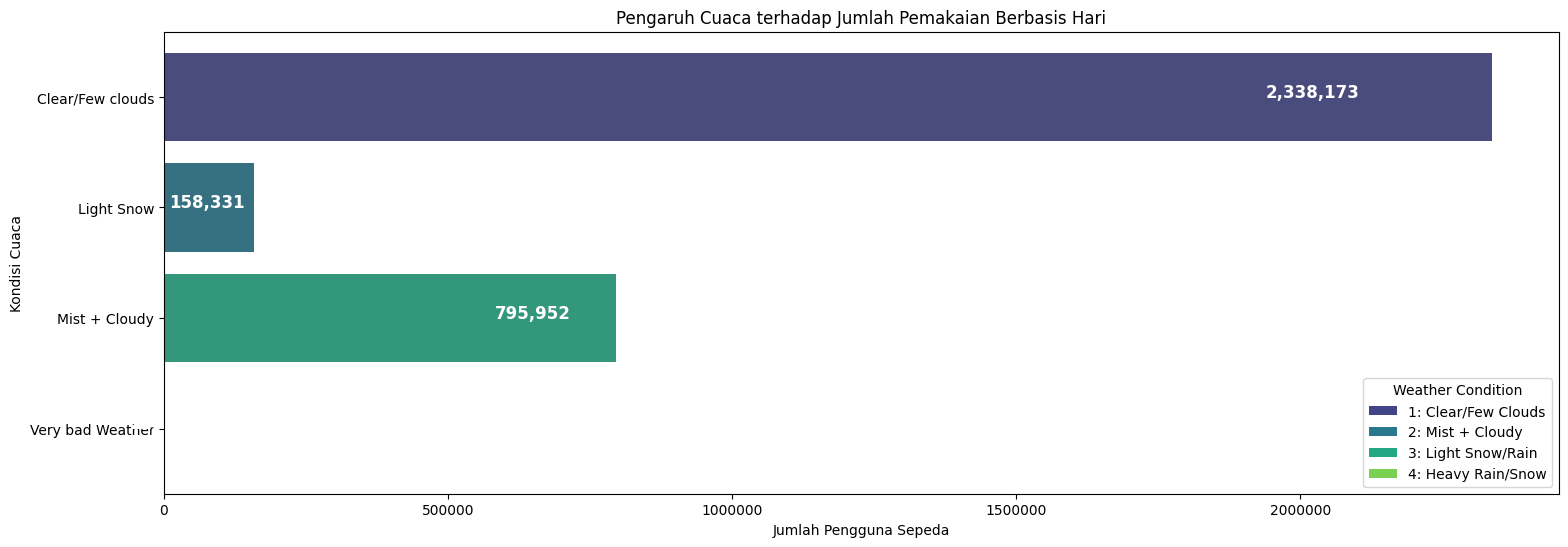

In [302]:
# Kelompokkan data berdasarkan kondisi cuaca (weathersit) dan hitung total jumlah pengguna
weather_summary = bike_aggDay_df.groupby('weathersit')['cnt'].sum().reset_index()

# Kelompokkan data berdasarkan kondisi cuaca (weathersit) dan hitung total jumlah pengguna
weather_summary = bike_aggHours_df.groupby('weathersit')['cnt'].sum().reset_index()

# Ubah 'weathersit' menjadi kategori
weather_summary['weathersit'] = weather_summary['weathersit'].astype(str)

# Buat bar plot vertikal
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=weather_summary, y='weathersit', x='cnt', palette='viridis')

# Tambahkan label di dalam batang bar
for index, value in enumerate(weather_summary['cnt']):
    plt.text(value - (value * 0.1), index, f"{int(value):,}", color='white', ha='right', fontsize=12, fontweight='bold')

# Format label sumbu X agar menjadi angka bulat
plt.xticks(ticks=plt.xticks()[0], labels=[int(x) for x in plt.xticks()[0]])

# Tambahkan label dan judul
plt.ylabel('Kondisi Cuaca')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.title('Pengaruh Cuaca terhadap Jumlah Pemakaian Berbasis Hari')

# Tambahkan legend secara manual
legend_labels = ['1: Clear/Few Clouds', '2: Mist + Cloudy', '3: Light Snow/Rain', '4: Heavy Rain/Snow']
for i, label in enumerate(legend_labels):
    plt.bar(0, 0, color=sns.color_palette('viridis', 4)[i], label=label)  # Dummy bars

plt.legend(title="Weather Condition", loc="lower right")

# Tampilkan plot
plt.show()

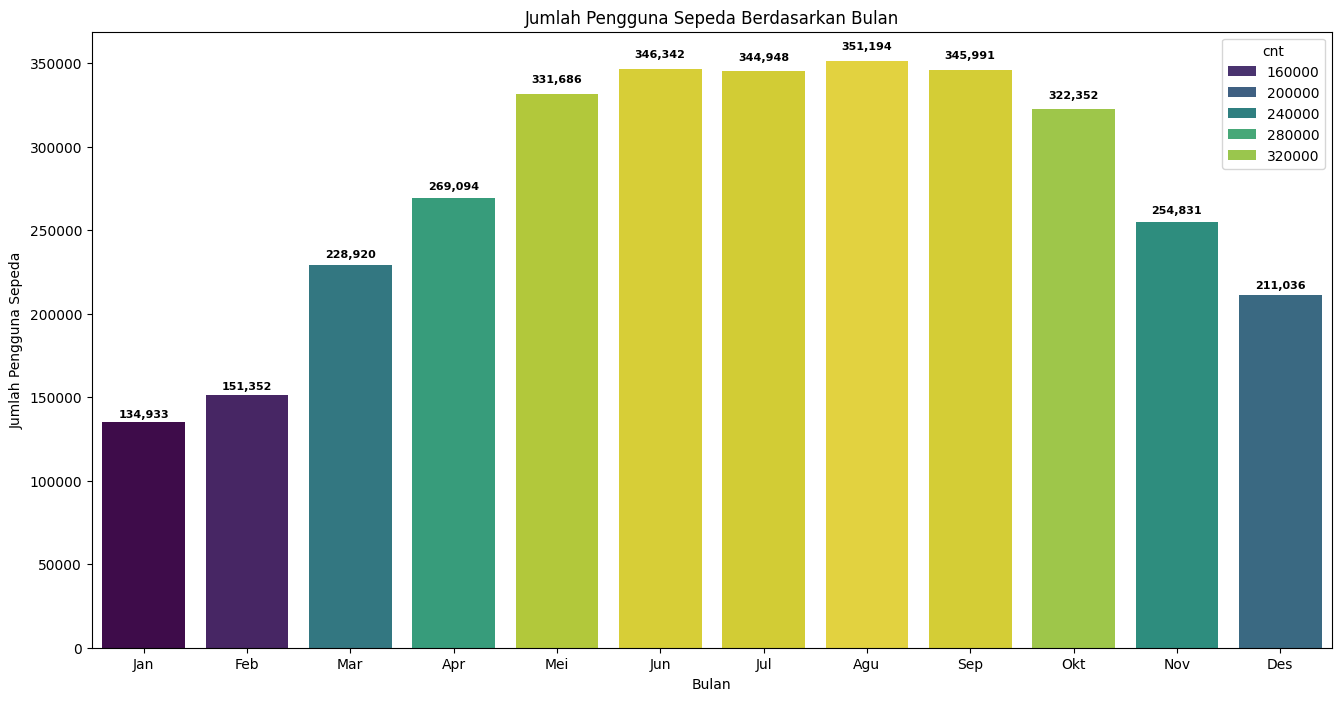

In [312]:
# Kelompokkan data berdasarkan bulan dan hitung total jumlah pengguna
monthly_summary = bike_aggDay_df.groupby('mnth')['cnt'].sum().reset_index()

# Buat bar plot
plt.figure(figsize=(16, 8))
sns.barplot(data=monthly_summary, x='mnth', y='cnt', palette='viridis', hue='cnt')

# Tambahkan label di atas batang
for index, value in enumerate(monthly_summary['cnt']):
    plt.text(index, value + (value * 0.02), f"{int(value):,}", ha='center', fontsize=8, fontweight='bold')

# Format sumbu x menjadi nama bulan
bulan_labels = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]
plt.xticks(ticks=range(12), labels=bulan_labels)

# Tambahkan label dan judul
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Jumlah Pengguna Sepeda Berdasarkan Bulan")

# Tampilkan plot
plt.show()

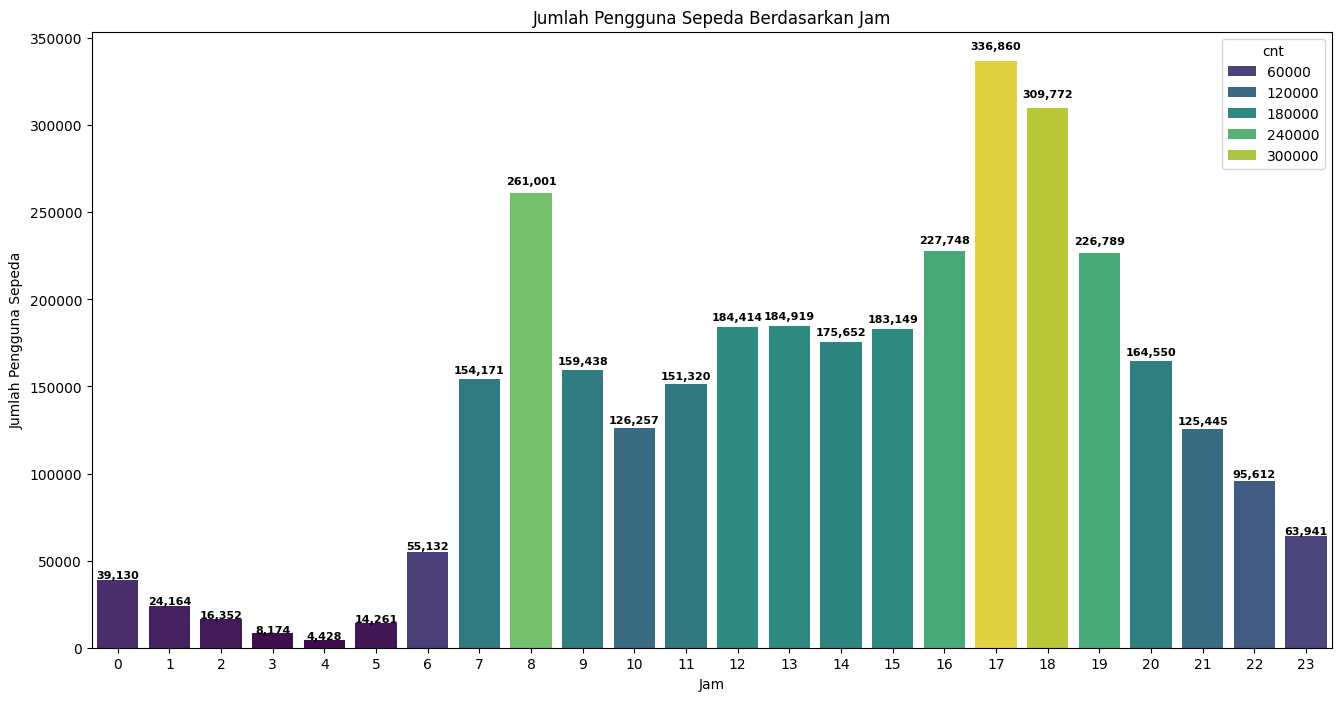

In [309]:
# Kelompokkan data berdasarkan jam dan hitung total jumlah pengguna
hourly_summary = bike_aggHours_df.groupby('hr')['cnt'].sum().reset_index()

# Buat bar plot
plt.figure(figsize=(16, 8))
sns.barplot(data=hourly_summary, x='hr', y='cnt', palette='viridis', hue='cnt')

# Tambahkan label di atas batang
for index, value in enumerate(hourly_summary['cnt']):
    plt.text(index, value + (value * 0.02), f"{int(value):,}", ha='center', fontsize=8, fontweight='bold')

# Format sumbu x menjadi angka jam
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)])

# Tambahkan label dan judul
plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Jumlah Pengguna Sepeda Berdasarkan Jam")

# Tampilkan plot
plt.show()

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_21711/282638889.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='season', y='cnt', palette='cividis')


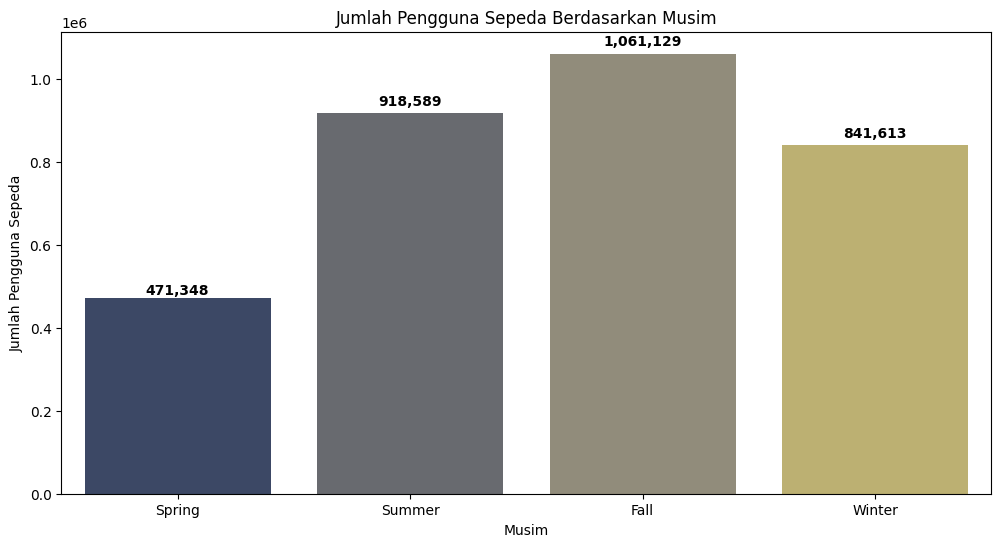

In [311]:
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Kelompokkan data berdasarkan musim dan hitung total jumlah pengguna
season_summary = bike_aggHours_df.groupby('season')['cnt'].sum().reset_index()

# Konversi kolom season menjadi kategori dengan urutan yang benar
season_summary['season'] = pd.Categorical(season_summary['season'], 
                                          categories=season_order, 
                                          ordered=True)

# Urutkan berdasarkan kategori musim
season_summary = season_summary.sort_values('season')

# Buat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=season_summary, x='season', y='cnt', palette='cividis')

# Tambahkan label di atas batang
for index, value in enumerate(season_summary['cnt']):
    plt.text(index, value + (value * 0.02), f"{int(value):,}", ha='center', fontsize=10, fontweight='bold')

# Tambahkan label dan judul
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Jumlah Pengguna Sepeda Berdasarkan Musim")

# Tampilkan plot
plt.show()

# Jawaban Pertanyaan Bisnis Pertama

Ya, faktor cuaca sangat mendukung jumlah pengguna di setiap hari maupun jamnya. Hal ini dibuktkan dengan visualisasi data yang mengatakan bahwa jumlah pengguna *Bike Sharing* meningkat terutama ketika kondisi cuaca sedang cerah-cerahnya, pada peak season, ketika musim gugur dan panas, serta banyak digunakan ketika pukul berangkat kerja dan pulang kerja(pukul 8 pagi dan 17/18 sore). Hal ini membuktikan kebanyakan pengguna dari sistem *bike sharing* ini adalah kaum-kaum pekerja. Lalu bagaimana perilaku penyewaan antara pengguna yang terdaftar dengan kasual?

### Pertanyaan 2: Apakah terdapat perbedaan perilaku penyewaan antara pengguna terdaftar dan pengguna kasual?

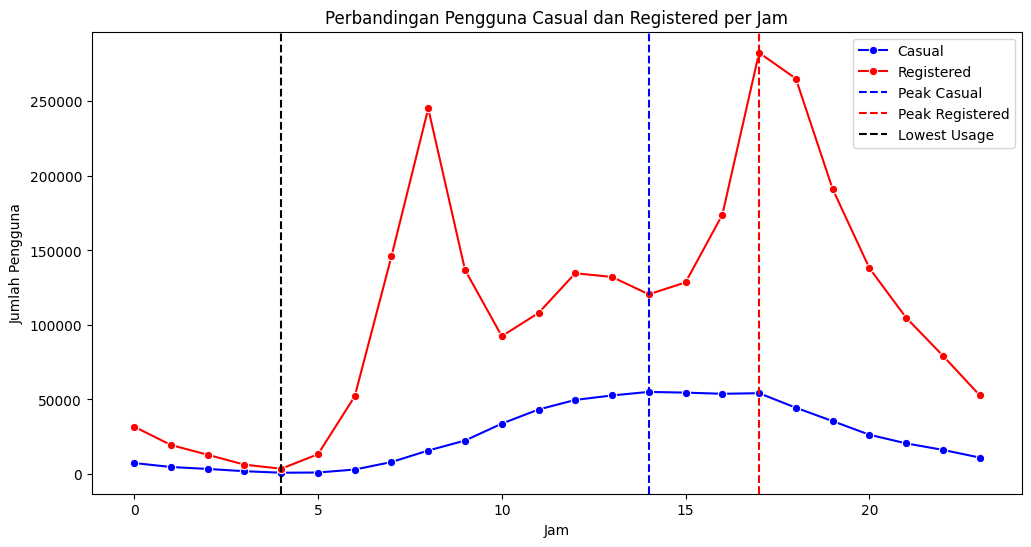

In [313]:
# 1. Pengguna berdasarkan jam
hourly_summary = bike_aggHours_df.groupby('hr')[['casual', 'registered']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_summary, x='hr', y='casual', label='Casual', marker='o', color='blue')
sns.lineplot(data=hourly_summary, x='hr', y='registered', label='Registered', marker='o', color='red')
plt.axvline(14, linestyle='--', color='blue', label='Peak Casual')
plt.axvline(17, linestyle='--', color='red', label='Peak Registered')
plt.axvline(4, linestyle='--', color='black', label='Lowest Usage')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.title('Perbandingan Pengguna Casual dan Registered per Jam')
plt.legend()
plt.show()

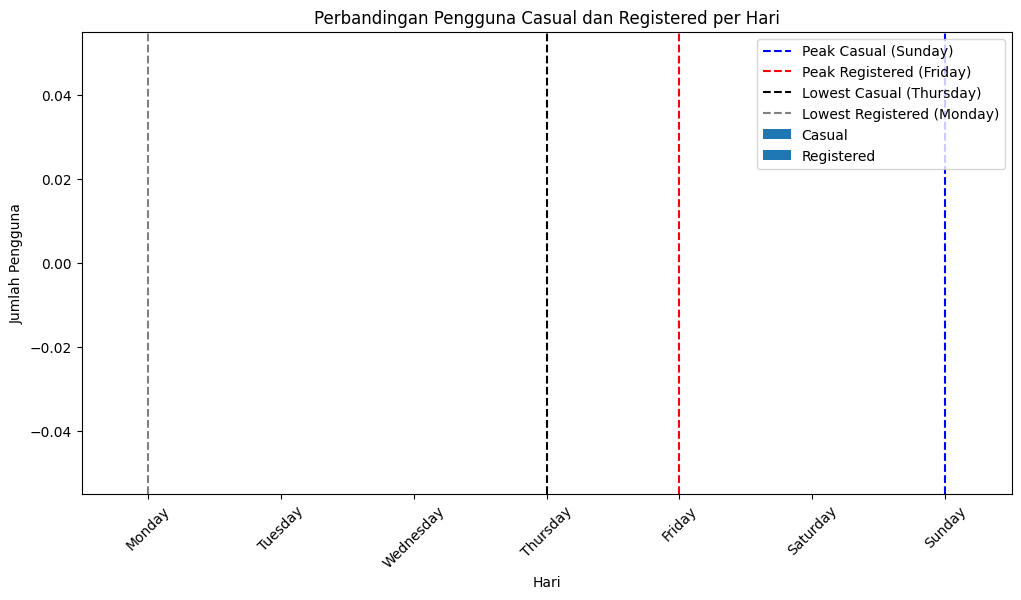

In [323]:
# 2. Pengguna berdasarkan hari
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_summary = bike_aggDay_df.groupby('weekday')[['casual', 'registered']].sum().reset_index()
weekday_summary['weekday'] = pd.Categorical(weekday_summary['weekday'], categories=weekday_order, ordered=True)
weekday_summary = weekday_summary.sort_values('weekday')
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_summary, x='weekday', y='casual', color='blue', label='Casual')
sns.barplot(data=weekday_summary, x='weekday', y='registered', color='red', label='Registered', alpha=0.7)
plt.axvline(6, linestyle='--', color='blue', label='Peak Casual (Sunday)')
plt.axvline(4, linestyle='--', color='red', label='Peak Registered (Friday)')
plt.axvline(3, linestyle='--', color='black', label='Lowest Casual (Thursday)')
plt.axvline(0, linestyle='--', color='gray', label='Lowest Registered (Monday)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.title('Perbandingan Pengguna Casual dan Registered per Hari')
plt.xticks(rotation=45)
plt.legend()
plt.show()

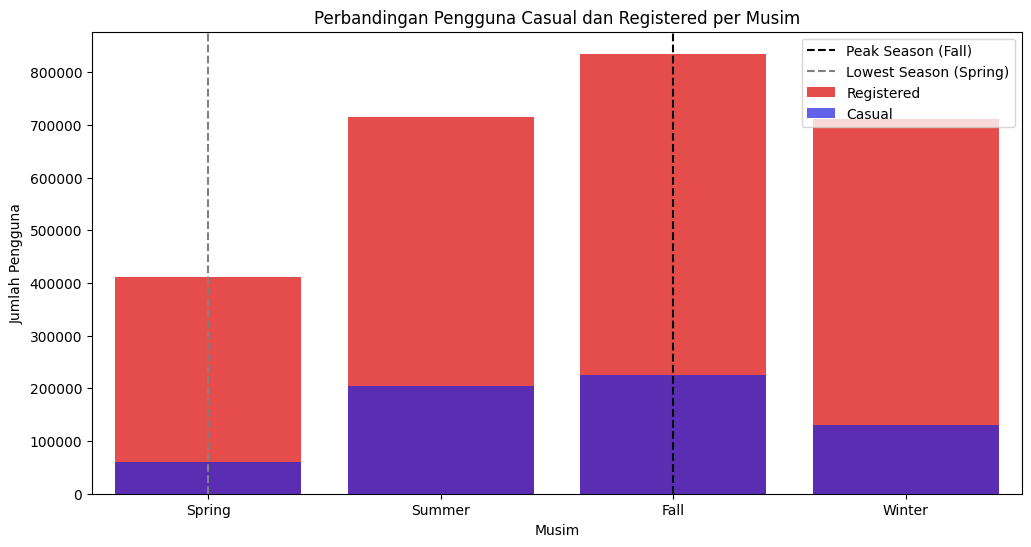

In [321]:
# 3. Pengguna berdasarkan musim
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_summary = bike_aggHours_df.groupby('season')[['casual', 'registered']].sum().reset_index()
season_summary['season'] = pd.Categorical(season_summary['season'], categories=season_order, ordered=True)
season_summary = season_summary.sort_values('season')
plt.figure(figsize=(12, 6))
sns.barplot(data=season_summary, x='season', y='registered', color='red', label='Registered', alpha=0.8)
sns.barplot(data=season_summary, x='season', y='casual', color='blue', label='Casual', alpha=0.7)
plt.axvline(2, linestyle='--', color='black', label='Peak Season (Fall)')
plt.axvline(0, linestyle='--', color='gray', label='Lowest Season (Spring)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.title('Perbandingan Pengguna Casual dan Registered per Musim')
plt.legend()
plt.show()

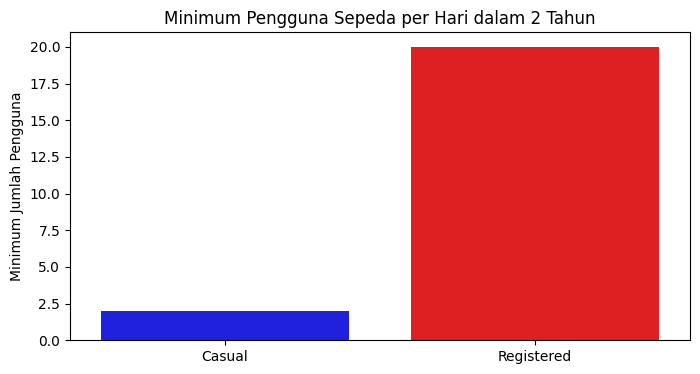

In [350]:
# 4. Minimum jumlah pengguna per hari selama 2 tahun
warnings.simplefilter(action='ignore', category=FutureWarning)
min_casual = bike_aggDay_df['casual'].min()
min_registered = bike_aggDay_df['registered'].min()
plt.figure(figsize=(8, 4))
sns.barplot(x=['Casual', 'Registered'], y=[min_casual, min_registered], palette=['blue', 'red'])
plt.ylabel('Minimum Jumlah Pengguna')
plt.title('Minimum Pengguna Sepeda per Hari dalam 2 Tahun')
plt.show()

**Insight:**

Melihat dari keempat grafi tersebut, ternyata pengguna dengan registered paling banyak digunakan terutama dalam 2 tahun terakhir ini, paling sering digunakan ketika jam kerja dan pulang kerja terutama ketika musim-musim yang memberikan kejelasan pada jarak pandang seperti musi gugur dan musim panas. Hal ini dibuktikan ketika pengguna kasual dan registered lebih banyak menggunakan sepeda ketika musim gugur. Lalu pengguna registered lebih banyak menggunakan ketika menuju akhir pekan(jumat) terutama ketika pukul berangkat dan pulang kantor/kerja. Berbeda dengan pengguna casual yang lebih banyak menggunakan sepeda di akhir pekan, terutama dihari minggu.

## Analisis Lanjutan (Opsional)

In [341]:
# Konversi tanggal ke datetime jika belum
bike_aggDay_df['dteday'] = pd.to_datetime(bike_aggDay_df['dteday'])

# Kelompokkan data berdasarkan pengguna (instant)
rfm_df = bike_aggDay_df.groupby(by='instant', as_index=False).agg({
    'dteday': 'max',  # Tanggal terakhir pengguna meminjam sepeda (Recency)
    'cnt': ['count', 'sum']  # Frequency: Jumlah hari pengguna meminjam sepeda, Monetary: Total sepeda yang dipinjam
})

# Ubah nama kolom agar sesuai dengan konsep RFM
rfm_df.columns = ['instant', 'max_order_timestamp', 'frequency', 'monetary']

# Hitung nilai recency (berapa hari sejak terakhir meminjam sepeda)
recent_date = bike_aggDay_df['dteday'].max()
rfm_df['recency'] = (recent_date - rfm_df['max_order_timestamp']).dt.days

# Hapus kolom max_order_timestamp karena sudah tidak diperlukan
rfm_df.drop(columns=['max_order_timestamp'], inplace=True)

rfm_df.head()

,instant,frequency,monetary,recency
0,1,1,985,730
1,2,1,801,729
2,3,1,1349,728
3,4,1,1562,727
4,5,1,1600,726


In [342]:
rfm_df['frequency'].value_counts()

frequency
1    731
Name: count, dtype: int64

In [343]:
# Konversi tanggal ke datetime jika belum
bike_aggHours_df['dteday'] = pd.to_datetime(bike_aggDay_df['dteday'])

# Kelompokkan data berdasarkan pengguna (instant)
rfm_df = bike_aggDay_df.groupby(by='instant', as_index=False).agg({
    'dteday': 'max',  # Tanggal terakhir pengguna meminjam sepeda (Recency)
    'cnt': ['count', 'sum']  # Frequency: Jumlah hari pengguna meminjam sepeda, Monetary: Total sepeda yang dipinjam
})

# Ubah nama kolom agar sesuai dengan konsep RFM
rfm_df.columns = ['instant', 'max_order_timestamp', 'frequency', 'monetary']

# Hitung nilai recency (berapa hari sejak terakhir meminjam sepeda)
recent_date = bike_aggDay_df['dteday'].max()
rfm_df['recency'] = (recent_date - rfm_df['max_order_timestamp']).dt.days

# Hapus kolom max_order_timestamp karena sudah tidak diperlukan
rfm_df.drop(columns=['max_order_timestamp'], inplace=True)

rfm_df.head()

,instant,frequency,monetary,recency
0,1,1,985,730
1,2,1,801,729
2,3,1,1349,728
3,4,1,1562,727
4,5,1,1600,726


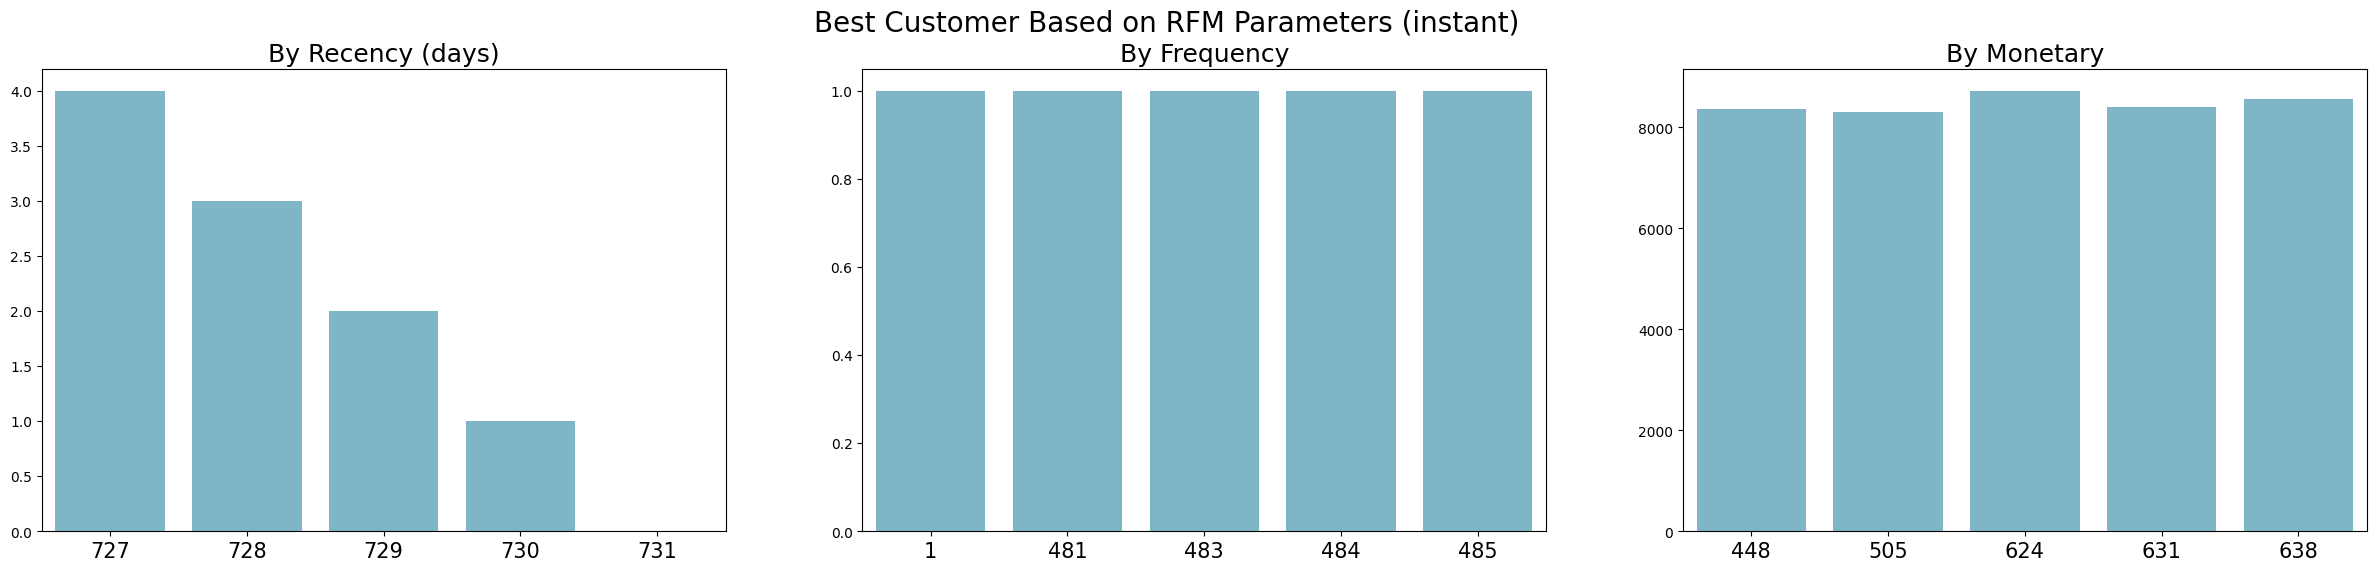

In [349]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

warnings.simplefilter(action='ignore', category=FutureWarning)
 
sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (instant)", fontsize=20)
plt.show()


## Conclusion

- Ya cuaca mempengaruhi jumlah peminjaman sepeda, semakin baik cuacanya, semakin banyak pula yang menggunakan sepeda sebagai transportasi mereka
- Pengguna terdaftar lebih sering menggunakan sepeda daripada pengguna kasual, terutama pada hari weekend dan juga pukul pulang kerja dan berangkat kerja dan cuaca yang cerah sehingga musim yang memberikan pandangan jelas seperti musim gugur dan musim panas menjadi waktu yang tepat untuk para pengguna terdaftar maupun kasual menggunakan sepeda.